## Wheather host country has any advantages or not?

### Loading Olympic edition DataFrame

We are gonna use The Guardian's Olympic medal dataset.


Initially, editions has 26 rows (one for each Olympic edition, i.e., a year in which the Olympics was held) and 7 columns: 'Edition', 'Bronze', 'Gold', 'Silver', 'Grand Total', 'City', and 'Country'.

For the analysis that follows, we keep only the useful columns from editions: 'Edition', 'Grand Total', City, and Country.

In [13]:
#Import pandas
import pandas as pd

# Create file path: file_path
file_path = 'Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'

# Load DataFrame from file_path: editions
editions = pd.read_csv(file_path, sep = '\t')



In [14]:
# Extract the relevant columns: editions
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]

# Print editions DataFrame
editions.tail()

,Edition,Grand Total,City,Country
21,1992,1705,Barcelona,Spain
22,1996,1859,Atlanta,United States
23,2000,2015,Sydney,Australia
24,2004,1998,Athens,Greece
25,2008,2042,Beijing,China


### Loading IOC codes DataFrame

Prepare a DataFrame ioc_codes from CSV file.

Initially, ioc_codes has 200 rows (one for each country) and 3 columns: 'Country', 'NOC', & 'ISO code'.

For the analysis that follows, we want to keep only the useful columns from ioc_codes: 'Country' and 'NOC' (the column 'NOC' contains three-letter codes representing each country).

In [15]:
# Create the file path: file_path
file_path = 'Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'

# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv(file_path)

# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes.loc[:,['Country', 'NOC']]

# Print first and last 5 rows of ioc_codes
print(ioc_codes.head())
print(ioc_codes.tail())

           Country  NOC
0      Afghanistan  AFG
1          Albania  ALB
2          Algeria  ALG
3  American Samoa*  ASA
4          Andorra  AND
             Country  NOC
196          Vietnam  VIE
197  Virgin Islands*  ISV
198            Yemen  YEM
199           Zambia  ZAM
200         Zimbabwe  ZIM


### Building medals DataFrame


In [16]:
medals = pd.read_csv('Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv', sep = '\t', skiprows = 4)
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


## Quantifying Performance

### Constructiong a pivot tabel
- index: column to use as index of pivot table
- values: columns to agregate
- aggfucn: function to apply for aggregation
- columns: categories as columns of pivot table

### Counting medals by country/edition in a pivot table

Here, you'll start with the concatenated DataFrame medals from the previous exercise.

You can construct a pivot table to see the number of medals each country won in each year. The result is a new DataFrame with the Olympic edition on the Index and with 138 country NOC codes as columns. If you want a refresher on pivot tables, it may be useful to refer back to the relevant exercises in Manipulating DataFrames with pandas.

In [17]:
# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(index = 'Edition', values = 'Athlete', columns = 'NOC', aggfunc = 'count')
# # aggfunc=lambda x: len(x.unique()) works as well

# Print the first & last 5 rows of medal_counts
medal_counts.head()


NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
medal_counts.tail()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1992,NaN,NaN,2.0,NaN,2.0,NaN,57.0,6.0,NaN,1.0,...,NaN,NaN,224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,3.0,NaN,20.0,2.0,132.0,3.0,1.0,5.0,...,NaN,NaN,260.0,2.0,NaN,NaN,26.0,1.0,NaN,NaN
2000,NaN,NaN,5.0,NaN,20.0,1.0,183.0,4.0,3.0,6.0,...,NaN,1.0,248.0,4.0,NaN,1.0,26.0,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,47.0,NaN,157.0,8.0,5.0,2.0,...,NaN,NaN,264.0,5.0,2.0,NaN,NaN,NaN,3.0,NaN
2008,1.0,NaN,2.0,NaN,51.0,6.0,149.0,3.0,7.0,5.0,...,NaN,NaN,315.0,6.0,1.0,1.0,NaN,NaN,4.0,NaN


#### As you can see, the pivot table DataFrame has mostly NaN entries (because most countries do not win any medals in a given Olympic edition).

### Computing fraction of medals per Olympic edition

We need to extract a Series with the total number of medals awarded in each Olympic edition.

The DataFrame medal_counts can be divided row-wise by the total number of medals awarded each edition; the method .divide() performs the broadcast.

This gives us a normalized indication of each country's performance in each edition.

In [19]:
# Set Index of editions: totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']

# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis = 'rows')

# Print first & last 5 rows of fractions
fractions.head()


NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113,NaN,NaN,...,NaN,NaN,0.132450,NaN,NaN,NaN,NaN,NaN,NaN,0.039735
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.009766,0.011719,NaN,NaN,...,NaN,NaN,0.107422,NaN,NaN,NaN,NaN,NaN,NaN,0.066406
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002128,NaN,NaN,...,NaN,NaN,0.838298,NaN,NaN,NaN,NaN,NaN,NaN,0.017021
1908,NaN,NaN,NaN,0.023632,NaN,NaN,NaN,0.001244,NaN,NaN,...,NaN,NaN,0.078358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,0.011299,NaN,NaN,NaN,0.015819,NaN,NaN,...,NaN,NaN,0.114124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
fractions.tail()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1992,NaN,NaN,0.001173,NaN,0.001173,NaN,0.033431,0.003519,NaN,0.000587,...,NaN,NaN,0.131378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,0.001614,NaN,0.010758,0.001076,0.071006,0.001614,0.000538,0.002690,...,NaN,NaN,0.139860,0.001076,NaN,NaN,0.013986,0.000538,NaN,NaN
2000,NaN,NaN,0.002481,NaN,0.009926,0.000496,0.090819,0.001985,0.001489,0.002978,...,NaN,0.000496,0.123077,0.001985,NaN,0.000496,0.012903,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,0.023524,NaN,0.078579,0.004004,0.002503,0.001001,...,NaN,NaN,0.132132,0.002503,0.001001,NaN,NaN,NaN,0.001502,NaN
2008,0.00049,NaN,0.000979,NaN,0.024976,0.002938,0.072968,0.001469,0.003428,0.002449,...,NaN,NaN,0.154261,0.002938,0.000490,0.000490,NaN,NaN,0.001959,NaN


### Computing percentage change in fraction of medals won

To see if there is a host country advantage, we first want to see how the fraction of medals won changes from edition to edition.

The expanding mean provides a way to see this down each column. It is the value of the mean with all the data available up to that point in time. 

In [21]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change()*100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()

# Print first & last 5 rows of fractions_change
fractions_change.head()


NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688,NaN,...,NaN,NaN,-9.448242,NaN,NaN,NaN,NaN,NaN,NaN,33.561198
2,1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386,NaN,...,NaN,NaN,199.651245,NaN,NaN,NaN,NaN,NaN,NaN,-22.642384
3,1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23.013510,NaN,...,NaN,NaN,-19.549222,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,1912,NaN,NaN,NaN,-26.092774,NaN,NaN,0.000000,6.254438,NaN,...,NaN,NaN,-12.105733,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [22]:
fractions_change.tail()

NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
21,1992,NaN,0.0,-7.214076,0.0,-6.767308,NaN,2.754114,-3.034840,NaN,...,0.0,0.000000,-1.329330,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.0
22,1996,NaN,0.0,8.959211,0.0,1.306696,NaN,10.743275,-3.876773,NaN,...,0.0,0.000000,-1.010378,NaN,0.000000,NaN,-2.667732,-10.758472,0.000000,0.0
23,2000,NaN,0.0,19.762488,0.0,0.515190,-26.935484,12.554986,-3.464221,88.387097,...,0.0,-12.025323,-1.341842,42.258065,0.000000,NaN,-2.696445,0.000000,0.000000,0.0
24,2004,NaN,0.0,0.000000,0.0,9.625365,0.000000,8.161162,-2.186922,48.982144,...,0.0,0.000000,-1.031922,21.170339,-1.615969,0.000000,0.000000,0.000000,-43.491929,0.0
25,2008,NaN,0.0,-8.197807,0.0,8.588555,91.266408,6.086870,-3.389836,31.764436,...,0.0,0.000000,-0.450031,14.610625,-6.987342,-0.661117,0.000000,0.000000,-23.316533,0.0


## Reshaping and plotting

### Building hosts DataFrame

Now prepare a DataFrame hosts by left joining editions and ioc_codes.

There are some missing NOC values; we will set those explicitly.

And reset the Index & print the final DataFrame.

In [23]:
editions.head()

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States
3,1908,804,London,United Kingdom
4,1912,885,Stockholm,Sweden


In [24]:
ioc_codes.head()

,Country,NOC
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND


In [25]:
# Import pandas
import pandas as pd

# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions, ioc_codes, how = 'left')


hosts.head()



,Edition,Grand Total,City,Country,NOC
0,1896,151,Athens,Greece,GRE
1,1900,512,Paris,France,FRA
2,1904,470,St. Louis,United States,USA
3,1908,804,London,United Kingdom,GBR
4,1912,885,Stockholm,Sweden,SWE


In [26]:
# Extract relevant columns and set index: hosts
hosts = hosts[['Edition', 'NOC']].set_index('Edition')

# Fix missing 'NOC' values of hosts
hosts.loc[hosts.NOC.isnull()]


,NOC
Edition,
1972,NaN
1980,NaN
1988,NaN


In [27]:
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts = hosts.reset_index()
# Print hosts
hosts

,Edition,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE
5,1920,BEL
6,1924,FRA
7,1928,NED
8,1932,USA
9,1936,GER


#### We now have a DataFrame consisting of all the hosts.

### Reshaping for analysis

Now we need to reshape the fractions_change DataFrame for later analysis.

Initially, fractions_change is a wide DataFrame of 26 rows (one for each Olympic edition) and 139 columns (one for the edition and 138 for the competing countries).

On reshaping with pd.melt(), as you will see, the result is a tall DataFrame with 3588 rows and 3 columns that summarizes the fractional change in the expanding mean of the percentage of medals won for each country in blocks.

In [28]:
fractions_change.head()

NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688,NaN,...,NaN,NaN,-9.448242,NaN,NaN,NaN,NaN,NaN,NaN,33.561198
2,1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386,NaN,...,NaN,NaN,199.651245,NaN,NaN,NaN,NaN,NaN,NaN,-22.642384
3,1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23.013510,NaN,...,NaN,NaN,-19.549222,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,1912,NaN,NaN,NaN,-26.092774,NaN,NaN,0.000000,6.254438,NaN,...,NaN,NaN,-12.105733,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [29]:
hosts.head()

,Edition,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE


In [30]:
reshaped = pd.melt(fractions_change, id_vars = 'Edition',
                  value_name = 'Change')
reshaped.head()

,Edition,NOC,Change
0,1896,AFG,NaN
1,1900,AFG,NaN
2,1904,AFG,NaN
3,1908,AFG,NaN
4,1912,AFG,NaN


In [31]:
# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped[reshaped['NOC'] == 'CHN']

# Print last 5 rows of chn with .tail()
chn.tail()

,Edition,NOC,Change
567,1992,CHN,4.240630
568,1996,CHN,7.860247
569,2000,CHN,-3.851278
570,2004,CHN,0.128863
571,2008,CHN,13.251332


#### On looking at the hosting countries from the last 5 Olympic editions and the fractional change of medals won by China the last 5 editions, we can see that China fared significantly better in 2008 (i.e., when China was the host country)

### Merging to compute influence

We need merge the two DataFrames and tidy the result.

The end result is a DataFrame summarizing the fractional change in the expanding mean of the percentage of medals won for the host country in each Olympic edition.

In [32]:
# Import pandas
import pandas as pd

# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts, how = 'inner')

# Print first 5 rows of merged
influence = merged.set_index('Edition').sort_index()
influence

,NOC,Change
Edition,,
1896,GRE,NaN
1900,FRA,198.002486
1904,USA,199.651245
1908,GBR,134.489218
1912,SWE,71.896226
1920,BEL,54.757887
1924,FRA,2.046362
1928,NED,36.315243
1932,USA,3.739184


### Plotting influence of host country

Now plot the influence of being a host country.

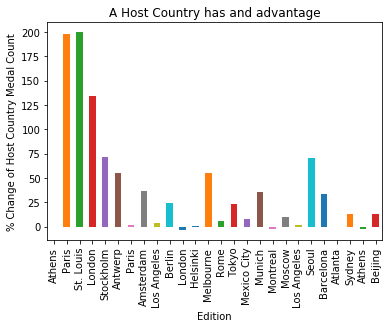

In [33]:
# Import pyplot
import matplotlib.pyplot as plt

# Extract influence['Change']: change
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind = 'bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("A Host Country has and advantage")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show()